# Conway's Game of Life

In [49]:
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipython_display
from matplotlib import pyplot as plt

def show_video(video_path):
    video = io.open(video_path, 'r+b').read()
    
    encoded = base64.b64encode(video)
    
    ipython_display.display(HTML(data="""
                                 <video alt="Conway's Game of Life"
                                    style="height: 400px;"
                                    loop
                                    controls>
                                    <source src="data:video/mp4;base64,{0}"
                                        type="video/mp4">
                                 </video>
                                 """.format(encoded.decode('ascii'))))

In [50]:
import numpy as np
import tqdm.notebook as nb

def life(X, steps):
    def roll_it(x, y):
        return np.roll(np.roll(X, y, axis=0), x, axis=1)
    
    for _ in range(steps):
        Y = roll_it(1, 0) + \
            roll_it(0, 1) + \
            roll_it(-1, 0) + \
            roll_it(0, -1) + \
            roll_it(1, 1) + \
            roll_it(-1, -1) + \
            roll_it(1, -1) + \
            roll_it(-1, 1)

        X = np.logical_or(np.logical_and(X, Y == 2), Y == 3)
        
        X = X.astype(int)
        
        yield X

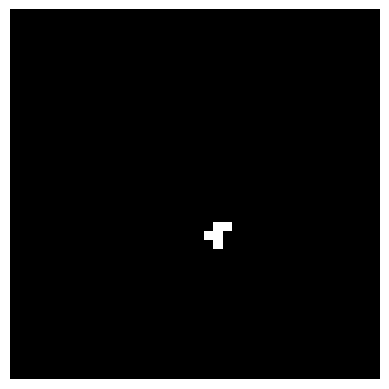

In [51]:
X = np.zeros((40, 40))
X[23, 22:24] = 1
X[24, 21:23] = 1
X[25, 22] = 1

plt.imshow(X, cmap='gray')
plt.axis('off')
plt.show()

In [52]:
from matplotlib import animation as mat_anim

FFMpegWriter = mat_anim.writers['ffmpeg']

writer = FFMpegWriter(fps=10, 
                     metadata=dict(title='Game of Life'))

fig = plt.figure()

fig.patch.set_facecolor('black')

with writer.saving(fig, './media/game_of_life.mp4', 200):
    plt.spy(X)
    plt.axis('off')
    writer.grab_frame()
    plt.clf()
    
    for x in nb.tqdm(life(X, 800), total=800):
        plt.spy(x)
        plt.axis('off')
        writer.grab_frame()
        plt.clf()

  0%|          | 0/800 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

In [53]:
show_video('./media/game_of_life.mp4')